In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df=pd.read_csv('Downloads/heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
X=np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
y=np.asarray(df['output'])
print(X[:5]);
print(y[:5])



[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[1 1 1 1 1]


KNN result:
X predict sample= [1 0 1 1 0]
f1_score_KNN= 0.8285714285714286
the classification report
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



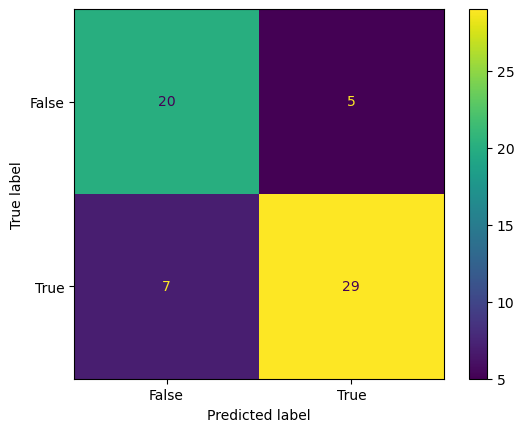

DecisionTree result:
X predict sample= [0 0 1 1 0]
f1_score_KNN= 0.8732394366197184
the classification report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



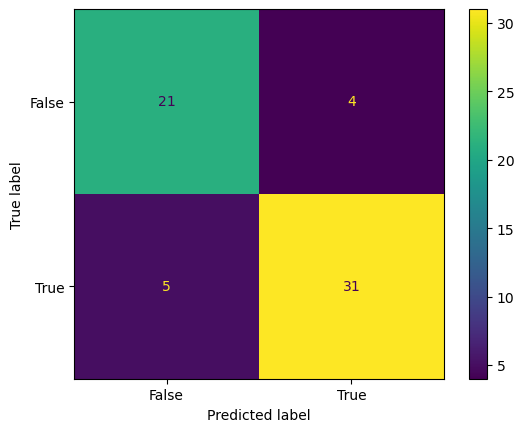

SVM result:
X predict sample= [0 0 1 1 0]
f1_score_KNN= 0.8285714285714286
the classification report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



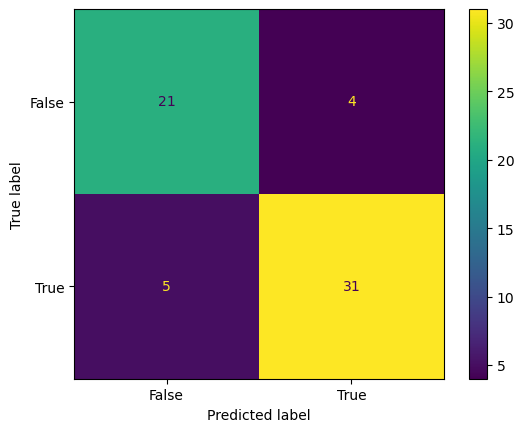

In [8]:
Machine_Types=['KNN','DecisionTree','SVM']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=4)

#Preprocessing X_train

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)



for i in Machine_Types:
    if i =='KNN':
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(X_scaled, y_train)
        y_pred_KNN=neigh.predict(X_test_scaled)
        f1_score_KNN=f1_score(y_test, y_pred_KNN)
        print('KNN result:');
        print('X predict sample=',y_pred_KNN[:5]);
        print('f1_score_KNN=',f1_score_KNN);
        print('the classification report\n',classification_report(y_test,y_pred_KNN ))
        confusion_matrix_KNN = confusion_matrix(y_test,y_pred_KNN)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN, display_labels = [False, True])
        cm_display.plot()
        plt.show()
        print('=======================================================================')
    elif i == 'DecisionTree':
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_scaled, y_train)
        y_pred_DT=clf.predict(X_test_scaled)
        f1_score_DT=f1_score(y_test, y_pred_DT)
        print('DecisionTree result:')
        print('X predict sample=',y_pred_DT[:5]);
        print('f1_score_KNN=',f1_score_DT);
        print('the classification report\n',classification_report(y_test,y_pred_DT ));
        confusion_matrix_DT = confusion_matrix(y_test,y_pred_DT)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_DT, display_labels = [False, True])
        cm_display.plot()
        plt.show()
        #unfortunately, i was not able to use graphviz liberary in order to plot the tree because of some os error which I am working on it to get fix.
        print('=======================================================================')
    else:
        clf_SVM = make_pipeline(StandardScaler(), SVC(kernel='linear',gamma='auto'))
        clf_SVM.fit(X_scaled, y_train)
        y_pred_SVM=clf.predict(X_test_scaled)
        f1_score_SVM=f1_score(y_test, y_pred_KNN)
        print('SVM result:')
        print('X predict sample=',y_pred_SVM[:5])
        print('f1_score_KNN=',f1_score_SVM);
        print('the classification report\n',classification_report(y_test,y_pred_SVM ));
        confusion_matrix_SVM = confusion_matrix(y_test,y_pred_SVM)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SVM, display_labels = [False, True])
        cm_display.plot()
        plt.show();



                
        
        
        
        